## Classifying with transfer learning


In [39]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [6]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.datasets import DatasetFolder

from torchvision import transforms


Transormations


In [7]:
data_transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [10]:
root = "data\hymenoptera_data\hymenoptera_data"
train_dir = os.path.join(root, 'train')
val_dir = os.path.join(root, 'val')

train_dataset = ImageFolder(root=train_dir, transform=data_transform_train)
val_dataset = ImageFolder(root=val_dir, transform=data_transform_val)


In [14]:
train_dataset.classes, train_dataset.class_to_idx

(['ants', 'bees'], {'ants': 0, 'bees': 1})

In [26]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

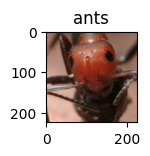

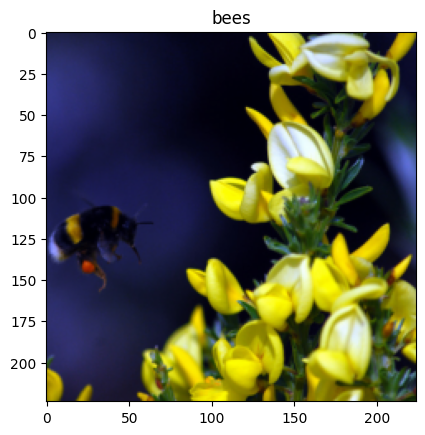

In [31]:
img, clsIdx = train_dataset[0]

figure = plt.figure(figsize=(4,4))

for i in range(2):
    randIdx = torch.randint(len(train_dataset), size=(1,)).item()
    subplot = figure.add_subplot(3, 1, i+1)
    img, clsIdx = train_dataset[randIdx]
    imshow(img, train_dataset.classes[clsIdx])



Data loaders

In [32]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=False)

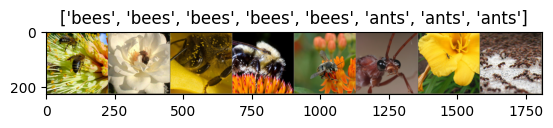

In [38]:
## make a grid from batch

import torchvision


bat1_inputs, bat1_vals = next(iter(train_dataloader))


grid = torchvision.utils.make_grid(bat1_inputs)

imshow(grid, title=[train_dataset.classes[i] for i in bat1_vals])


## Training the model

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs = 25, device='cpu'):
    st_time = time.time()


    for epoch in range(num_epochs):
        print(f"Epoch {epoch}/{num_epochs}")
        print("-"*10)

        ### Train
        model.train()
        running_loss = 0.0
        running_corrects = 0.0

        ## Train loop

        for inputs, labels in train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            ### zero grad

            optimizer.zero_grad()

            ## Forward

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            ## backward pass
            loss.backward()

            ## update weights
            optimizer.step()

            ## Statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)



        ## Validation loop
        model.eval()
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            
 

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = running_corrects.double() / len(train_dataset)

        print(f"Train loss :  Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} ")


    